#Imports

In [15]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Mount Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/YoloOpenCV

/content/drive/My Drive/YoloOpenCV


# Getting the Yolo Weights

In [6]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-10-26 10:57:46--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   106KB/s    in 51m 52s 

2020-10-26 11:49:40 (77.8 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [9]:
# Load Yolo
net = cv2.dnn.readNet("/content/drive/My Drive/YoloOpenCV/yolov3.weights", "/content/drive/My Drive/YoloOpenCV/yolo_config.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [10]:
# Loading image
img = cv2.imread("/content/drive/My Drive/YoloOpenCV/Coco_Class.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape
print(height, width, channels)

1843 1382 3


In [11]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [12]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [13]:
# Non maximum suppresion
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

Overlaying the bounding box predictions on the image

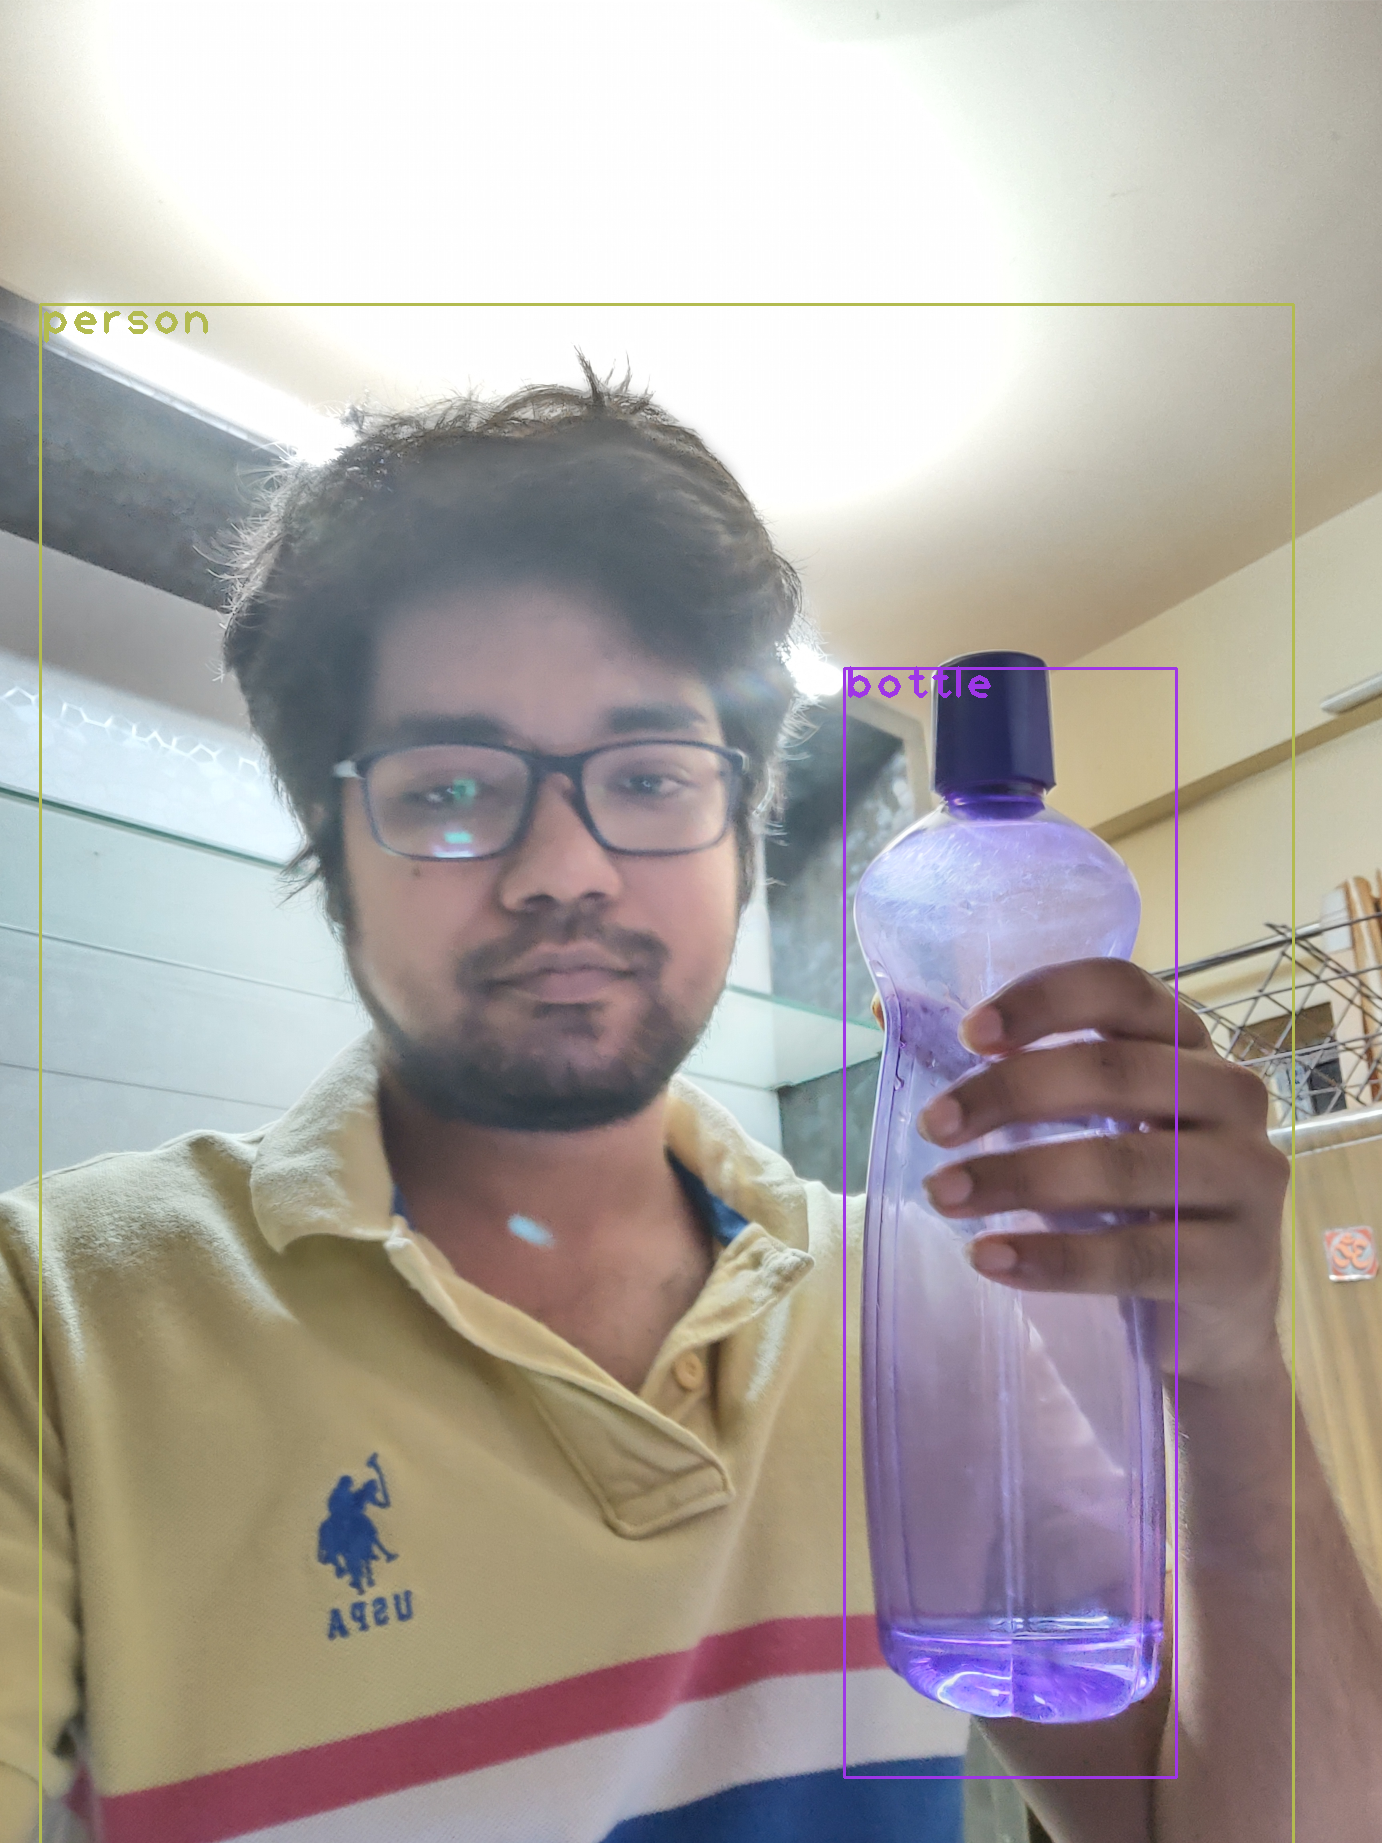

In [17]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Saving the image

In [19]:
cv2.imwrite("/content/drive/My Drive/YoloOpenCV/Coco_class.jpg", img)

True